<a href="https://colab.research.google.com/github/dineshRaja29/DataAnalysis/blob/main/EDA_Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 


### Objective:
Performing Exploratory Data Analysis on Haberman Cancer Survival dataset

#### Introduction:
Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set).


In [ ]:
import warnings
warnings.filterwarnings("ignore") 

#### Loading the Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")



In [ ]:
print (haberman.shape)

(306, 4)


In [ ]:
#(Q) What are the column names in our dataset?
print (haberman.columns)
## seeing few first entires of the dataset
print((haberman.head()))
print("***********************")
# seeing the few last entires of the dataset
print((haberman.tail()))

Index(['age', 'year', 'nodes', 'status'], dtype='object')
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
***********************
     age  year  nodes  status
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2


In [ ]:
print(haberman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


#### Conclusion:
* We have 306 data points
* Dataset contains three features column and one class label columns. 
* Features are <br>
    Age : Patient at which they undergone surgery (age from 30 to 83).<br>
    Operation Year : Year in which patient was undergone surgery(1958–1969).<br>
    ** Note **: 19 is omitting from the Operation year column.<br>
    Number of Axillary nodes(Lymph Nodes): Refere Wikipedia for this <br>
* Status is the binary class label which represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.
* ** Dataset is the imbalanced dataset because class labels 1 are significantly more compare to class 2 **.


### 2-D Scatter Plot 
Plotting the scatter plot for all combinations of feature

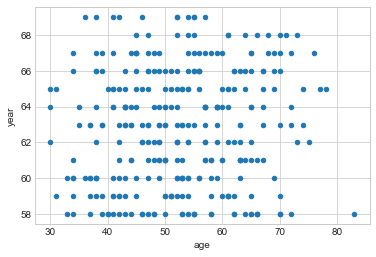

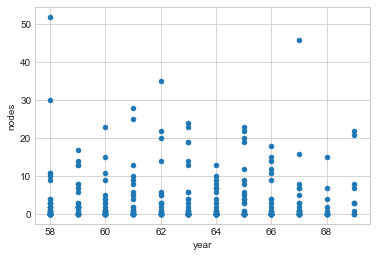

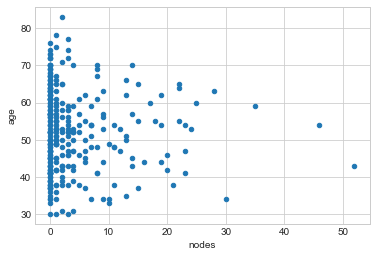

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
# 3C2 
# Selecting two feature from three features('age', 'year', 'nodes')
# 3 ways
haberman.plot(kind='scatter', x='age', y='year') ;
plt.show()
##
haberman.plot(kind='scatter', x='year', y='nodes') ;
plt.show()
##
haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.show()
##


#### Drawback cannot make the distinguish between the class labels

#### Coloring the Points based on the class labels

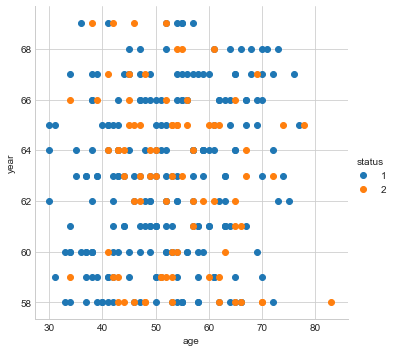

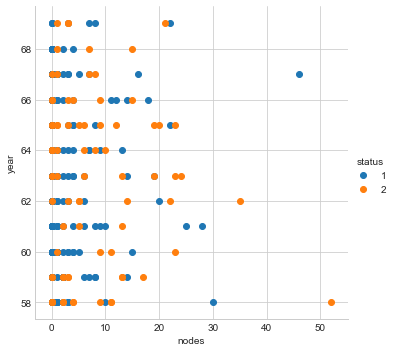

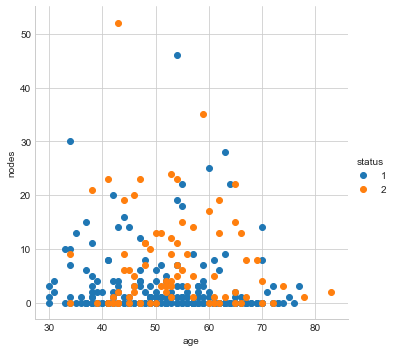

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

###
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend();
plt.show();
###
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();
###


**Observation(s):**
Till now its difficult to say anything about separation of the points with respect two features.
However, the plot with nodes and ages are little better 

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.


#### Pair-plot

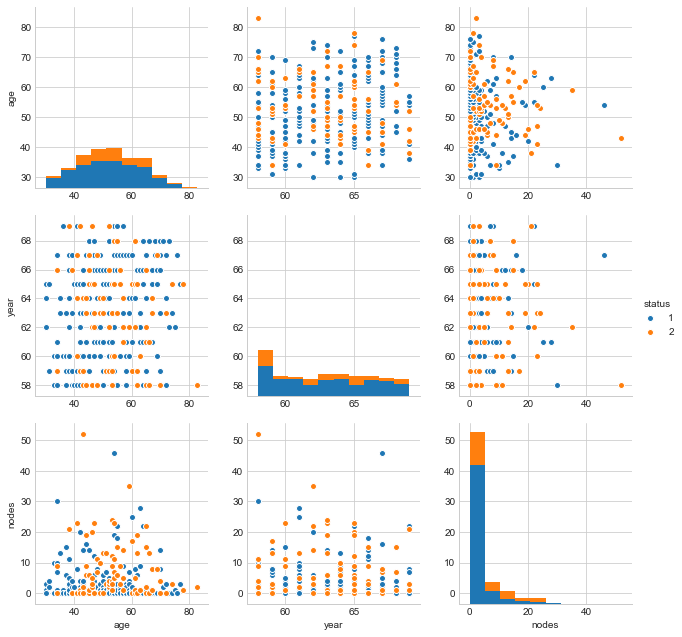

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue= 'status', vars = ['age', 'year', 'nodes'], size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. One thing I observed that as the node and age increases then the label tends to become class 2. 
2. Refer the plot of node and age with nodes less than 10 and age less than 40 most class labels are class 1.

####  Histogram, PDF, CDF

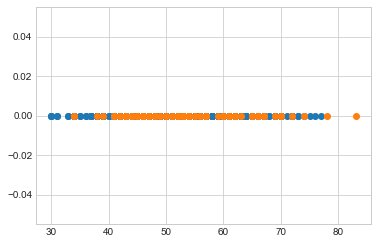

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
##################
import numpy as np
haberman_class1 = haberman.loc[haberman["status"] == 1];
haberman_class2 = haberman.loc[haberman["status"] == 2];
plt.plot(haberman_class1["age"], np.zeros_like(haberman_class1['age']), 'o')
plt.plot(haberman_class2["age"], np.zeros_like(haberman_class2['age']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

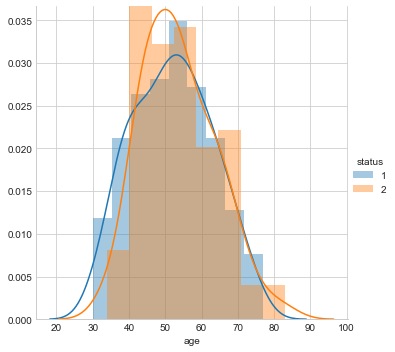

In [ ]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



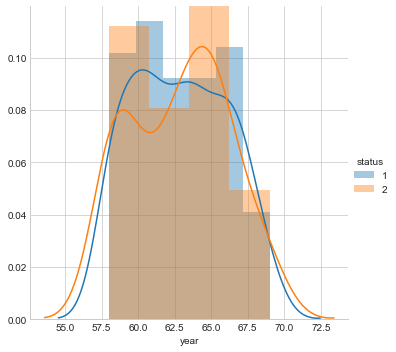

In [ ]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

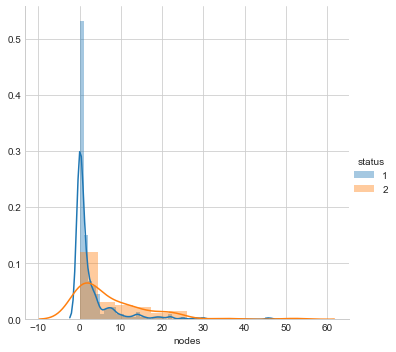

In [ ]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


########### 46
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
########### 52
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


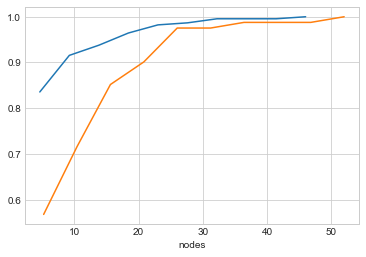

In [ ]:
# nodes cdf
counts, bin_edges = np.histogram(haberman_class1['nodes'], bins=10, 
                                 density = True)
print("###########", haberman_class1['nodes'].max())
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(haberman_class2['nodes'], bins=10, 
                                 density = True)
print("###########", haberman_class2['nodes'].max())

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("nodes")

plt.show();

#### Observation:
As the number of nodes are increasing, the class labels are tends to move closer to each other. 

#### Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("class1")
print(np.mean(haberman_class1["age"]))
print(np.mean(haberman_class1["nodes"]))
print(np.mean(haberman_class1["year"]))
print("class2")

print(np.mean(haberman_class2["age"]))
print(np.mean(haberman_class2["nodes"]))
print(np.mean(haberman_class2["year"]))
#Mean with an outlier.


print("\nStd-dev:");
print("class1")
print(np.std(haberman_class1["age"]))
print(np.std(haberman_class1["nodes"]))
print(np.std(haberman_class1["year"]))
print("class2")

print(np.std(haberman_class2["age"]))
print(np.std(haberman_class2["nodes"]))
print(np.std(haberman_class2["year"]))




Means:
class1
52.01777777777778
2.7911111111111113
62.86222222222222
class2
53.67901234567901
7.45679012345679
62.82716049382716

Std-dev:
class1
10.98765547510051
5.857258449412131
3.2157452144021956
class2
10.10418219303131
9.128776076761632
3.3214236255207883


#### Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("class1")
print(np.median(haberman_class1["age"]))
print(np.median(haberman_class1["nodes"]))
print(np.median(haberman_class1["year"]))
print("class2")
print(np.median(haberman_class2["age"]))
print(np.median(haberman_class2["nodes"]))
print(np.median(haberman_class2["year"]))

print("\nQuantiles:")
print("class1")
print(np.percentile(haberman_class1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_class1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_class1["year"], np.arange(0, 100, 25)))
print("class2")
print(np.percentile(haberman_class2["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_class2["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_class2["year"], np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_class1["age"],90))
print(np.percentile(haberman_class1["nodes"],90))
print(np.percentile(haberman_class1["year"], 90))
print("class2")
print(np.percentile(haberman_class2["age"],90))
print(np.percentile(haberman_class2["nodes"],90))
print(np.percentile(haberman_class2["year"], 90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("class1")
print(robust.mad(haberman_class1["age"]))
print(robust.mad(haberman_class1["nodes"]))
print(robust.mad(haberman_class1["year"]))
print("class2")
print(robust.mad(haberman_class2["age"]))
print(robust.mad(haberman_class2["nodes"]))
print(robust.mad(haberman_class2["year"]))


Medians:
class1
52.0
0.0
63.0
class2
53.0
4.0
63.0

Quantiles:
class1
[30. 43. 52. 60.]
[0. 0. 0. 3.]
[58. 60. 63. 66.]
class2
[34. 46. 53. 61.]
[ 0.  1.  4. 11.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
8.0
67.0
class2
67.0
20.0
67.0

Median Absolute Deviation
class1
13.343419966550417
0.0
4.447806655516806
class2
11.860817748044816
5.930408874022408
4.447806655516806


#### Box plot and Whiskers

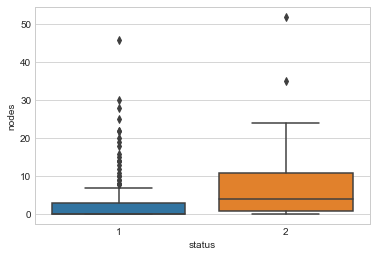

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

#### Violin plots

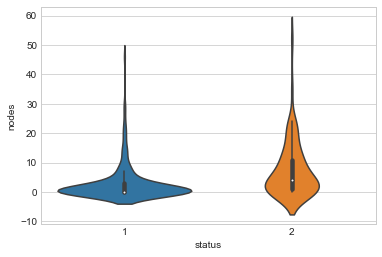

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

#### Salient Features
* Dataset is highly imbalanced data.  
* From common sense perspective the year of operation is useless
* As the node and age increases then the label tends to become class 2.
* The commmon if else classifier looks like: ("The plot of node and age with nodes less than 10 and age less than 40 most class labels are class 1" )<br>
     if (node < 10 and age < 40 ):
            print ("class 1") 
* The points belongs to class 1 when node is less than 10 is 92.0 % whereas belongs to class 2 is 70.0. However, as the node as increases then the point belongs to class 1 and class 2 is equivalent.
* The 25 quantile is same for both classes and rest quantiles are very much dissimilar. 
* The number of outliers in class 1 is very much high.
* The number of outliers in class 2 is very low.
* By analysis the above points we can say that we can predict the status of patient with probability.
            